In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
pounds = np.array([3.5, 3.69, 3.44, 3.43, 4.34, 4.42, 2.37])
miles = np.array([18, 15, 18, 16, 15, 14, 24])

In [161]:
x = pounds
y = miles
w = 0
b = 0
lr = 0.03
iterations = 1000
weight_track, bias_track, loss_track, dw_track, db_track = [],[],[],[],[]
y_hat_track = np.zeros((iterations,7))
i = 0   #for manual

### Manual

In [192]:
weight_track.append(w)
bias_track.append(b)
y_hat = w * x + b
y_hat_track[i] = y_hat
print(y_hat)

[15.83877505 16.61938887 15.59226542 15.55118049 19.28990982 19.61858932
 11.19617709]


In [193]:
loss = np.mean(np.square(y-y_hat))
loss_track.append(loss)
print(loss)

32.45738452598788


In [194]:
d_w = np.mean((y_hat - y) *2*x)
dw_track.append(d_w)
print(d_w)
d_b = np.mean((y_hat - y) *2)
db_track.append(d_b)
print(d_b)

0.4847179568090273
-1.7982039828375898


In [195]:
w = (w - lr * d_w)
b = (b - lr * d_b)
print(f'w = {w}\nb = {b}')

w = 4.093952233125273
b = 1.5129929691540192


In [196]:
i+=1
print(f'Iteration: {i}')

Iteration: 7


In [197]:
tracking = pd.DataFrame({'W':weight_track, 'B':bias_track, 'Loss':loss_track, 'd_w':dw_track, 'd_b':db_track})
tracking.head(6)

,W,B,Loss,d_w,d_b
0,0.000000,0.000000,303.714286,-119.717143,-34.285714
1,3.591514,1.028571,38.336048,-16.417344,-6.379930
2,4.084035,1.219969,32.982670,-1.889041,-2.452395
3,4.140706,1.293541,32.773486,0.153645,-1.897380
4,4.136097,1.350463,32.666412,0.440242,-1.816712
5,4.122889,1.404964,32.561703,0.479849,-1.802764


### Automation

Last iteration loss: 1.4699331330704388


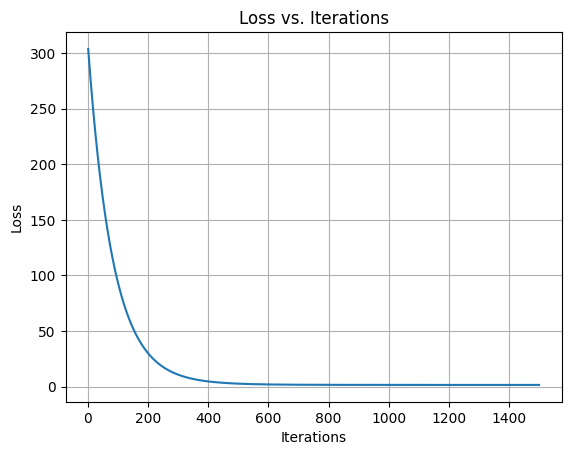

In [198]:
w = 0
b = 0
lr = 0.0696
iterations = 1500
weight_track, bias_track, loss_track, dw_track, db_track = [],[],[],[],[]
y_hat_track = np.zeros((iterations,7))


for i in range(iterations):
    weight_track.append(w)
    bias_track.append(b)

    y_hat = w * x + b
    loss = np.mean((y_hat - y)**2)
    y_hat_track[i] = y_hat
    loss_track.append(loss)

    dw = np.mean((y_hat-y)*2*x)
    db = np.mean((y_hat-y)*2)
    dw_track.append(dw)
    db_track.append(db)
    
    w = (w - lr * dw)
    b = (b - lr * db)
    
tracking = pd.DataFrame({'W':weight_track, 'B':bias_track, 'Loss':loss_track, 'd_w':dw_track, 'd_b':db_track})
print(f'Last iteration loss: {loss_track[-1]}')
plt.plot(range(1,iterations+1), tracking['Loss'], label='Loss')
plt.title('Loss vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid()
plt.show()